In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
from matplotlib.pyplot import figure
tfd = tfp.distributions

## DATAS

In [2]:
def normal_distribution(value, mu = 0, sigma = 1):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (value - mu)**2 / (2 * sigma**2) )

def modify_x(x, k, a, l, b):
    return (k*x+a)/(l*x+b+0.0001)

def inv_modify_x(x, k, a, l, b):
    return (b*x-a)/(-l*x+k-0.0001)

In [3]:
nbr_values = 101

mu_output = 0.5
sigma_output = 0.3

mu_noise = 0.01
sigma_noise = 0.05

nbr_iter = 1000
x_data=list()
x_adapted=list()
y_data=list()
y_observation=list()
for i in range(nbr_iter):
    new_x_data = inv_modify_x(np.linspace(0, 1, num=nbr_values), 0.2, -0.1, -3, 0.1)
    new_x_adapted = modify_x(new_x_data, 0.2, -0.1, -3, 0.1)
    
    
#     new_x_data = modify_x(np.linspace(0, 1, num=nbr_values), 1, 0.1, 3, 0.2)
#     new_x_adapted = inv_modify_x(new_x_data, 1, 0.1, 3, 0.2)
    
    
    new_y_data = normal_distribution(new_x_adapted, mu_output, sigma_output)
    new_y_observation= new_y_data + np.random.normal(mu_noise, sigma_noise, nbr_values)
    
    x_data.append(list(new_x_data))
    x_adapted.append(list(new_x_adapted))
    y_data.append(list(new_y_data))
    y_observation.append(list(new_y_observation))
    
x_data=np.array(x_data)
x_adapted=np.array(x_adapted)
y_data=np.array(y_data)
y_observation=np.array(y_observation)

### On essaie de prédire ça :

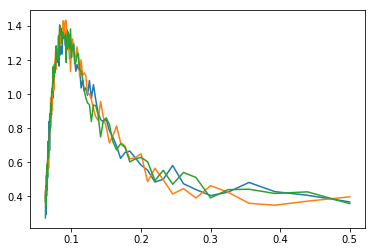

In [4]:
%matplotlib inline
plt.plot(x_data[0], y_observation[1])
plt.plot(x_data[0], y_observation[0])
plt.plot(x_data[0], y_observation[2])

## TENSORFLOW

#### Graph Definition

In [5]:



#Paramater(s)
lr = 0.01

#Placeholders
x = tf.placeholder(tf.float32, [nbr_values], name="x_placeholder")
y = tf.placeholder(tf.float32, [nbr_values], name="y_placeholder")


k = tf.Variable(0., name="k")
a = tf.Variable(0., name="a")
l = tf.Variable(0., name="l")
b = tf.Variable(1., name="b")


x_modified = tf.math.divide(tf.math.add(tf.math.multiply(k, x), a), 
                            tf.math.add(tf.math.multiply(l, x), b))


#Prediction
mu_tf = tf.Variable(1., name="mu")
sigma_tf = tf.Variable(1., name="sigma")
normal_distrib = tfd.Normal(loc=mu_tf, scale=sigma_tf)

pred = normal_distrib.prob(x_modified)


#Cost and training
cost = tf.losses.mean_squared_error(predictions=pred, labels=y)
train_op = tf.train.AdamOptimizer(lr).minimize(cost)

In [ ]:
121

#### Session

<IPython.core.display.Javascript object>


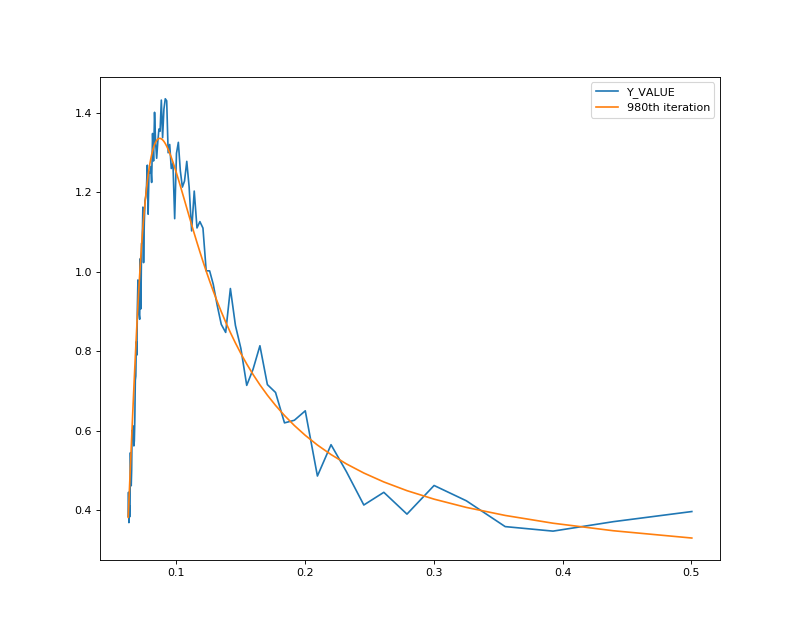

In [11]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    %matplotlib notebook
    
    
    fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    plt.ion()
    fig.show()
    fig.canvas.draw()


    
    mu_values = list()
    sigma_values = list()
    cost_values = list()
    for i in range(nbr_iter):
        batch_xs = x_data[i].reshape([nbr_values]).astype(np.float32)
        batch_ys = y_observation[i].reshape([nbr_values]).astype(np.float32)
        
        sess.run(train_op, feed_dict={
            x: batch_xs,
            y: batch_ys
        })
        
        i_iter = sess.run(pred, feed_dict={
            x: batch_xs,
            y: batch_ys
        })


        # Update the graph
        if (i%20==0):           
            ax.clear()
            ax.plot(x_data[0], y_observation[0], label="Y_VALUE")
            ax.plot(x_data[0], i_iter, label=str(i)+"th iteration")
            fig.canvas.draw()

       
        mu_values.append(sess.run(mu_tf, feed_dict={
            x: batch_xs,
            y: batch_ys
        }))
        sigma_values.append(sess.run(sigma_tf, feed_dict={
            x: batch_xs,
            y: batch_ys
        }))
        
        cost_values.append(sess.run(cost, feed_dict={
            x: batch_xs,
            y: batch_ys
        }))

    plt.legend()

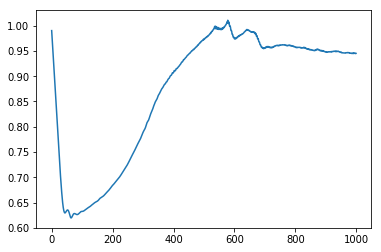

In [12]:
%matplotlib inline
plt.plot(mu_values)

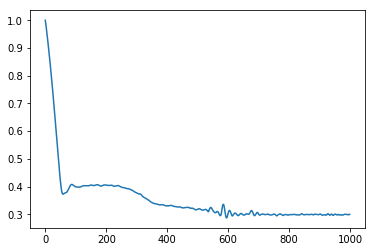

In [13]:
plt.plot(sigma_values)

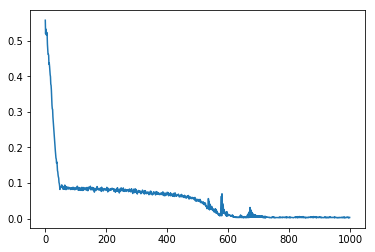

In [9]:
plt.plot(cost_values)